In [7]:
import skimage.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import diff_classifier.aws as aws
from skimage.filters import roberts, sobel, scharr, prewitt, median, rank
from skimage import img_as_ubyte
from skimage.morphology import erosion, dilation, opening, closing, white_tophat, disk, reconstruction
import diff_register.im_process as imp
from scipy.ndimage.morphology import distance_transform_edt

In [2]:
filename = 'BF_cells_PEG_1_XY1.tif'
folder = 'Cell_Studies/10_16_18_cell_study'
bucket = 'ccurtis.data'
longname = folder+'/'+filename

In [3]:
aws.download_s3(longname, filename, bucket_name=bucket)
bfimage = plt.imread(filename)

(-0.5, 2047.5, 2043.5, -0.5)

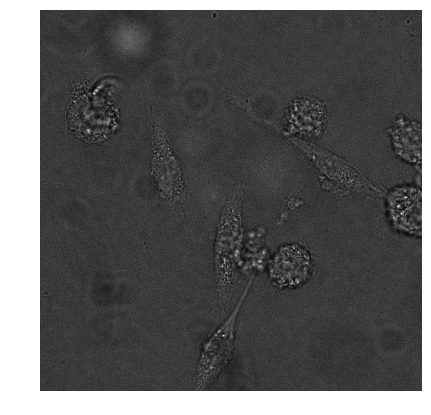

In [26]:
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(bfimage, cmap='gray')
plt.axis('off')

In [5]:
#Building an overall function:

def binary_BF(image, meanse=disk(10), edgefilt='prewitt', opense=disk(10),
          fill_first=False, bi_thresh=0.000025, tophatse=disk(20)):
    
    #convertim = img_as_ubyte(image)
    meanim = rank.mean(image, meanse)
    if edgefilt is 'prewitt':
        edgeim = prewitt(meanim)
    elif edgefilt is 'sobel':
        edgeim = sobel(meanim)
    elif edgefilt is 'scharr':
        edgeim = scharr(meanim)
    elif edgefilt is 'roberts':
        edgeim = roberts(meanim)
    
    closeim = closing(edgeim, opense)
    openim = opening(closeim, opense)
    if fill_first:
        seed = np.copy(openim)
        seed[1:-1, 1:-1] = openim.max()
        mask = openim
        filledim = reconstruction(seed, mask, method='erosion')
        binarim = filledim > bi_thresh
    else:
        binarim = openim > bi_thresh*np.mean(openim)
        seed = np.copy(binarim)
        seed[1:-1, 1:-1] = binarim.max()
        mask = binarim
        filledim = reconstruction(seed, mask, method='erosion')

    tophim = filledim - closing(white_tophat(filledim, tophatse), opense)>0.01

    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
    ax[0][0].imshow(image, cmap='gray')
    ax[0][1].imshow(meanim, cmap='gray')
    ax[0][2].imshow(edgeim, cmap='gray', vmax=4*np.mean(edgeim))
    ax[0][3].imshow(closeim, cmap='gray', vmax=4*np.mean(closeim))
    ax[1][0].imshow(openim, cmap='gray', vmax=4*np.mean(openim))
    ax[1][1].imshow(binarim, cmap='gray')
    ax[1][2].imshow(filledim, cmap='gray')
    ax[1][3].imshow(tophim, cmap='gray')
    for axes in ax:
        for axe in axes:
            axe.axis('off')
    fig.tight_layout()
    
    return tophim

C:\Users\koolk\Anaconda3\lib\site-packages\skimage\filters\rank\generic.py:102: UserWarning: Bitdepth of 11 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)
C:\Users\koolk\Anaconda3\lib\site-packages\skimage\morphology\greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
C:\Users\koolk\Anaconda3\lib\site-packages\skimage\morphology\greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different resul

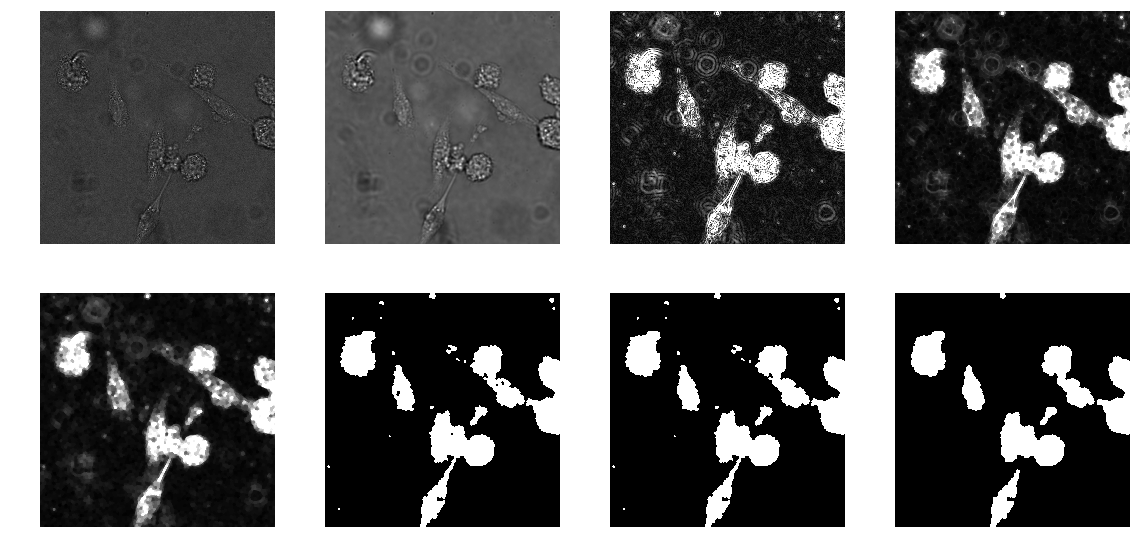

In [6]:
tophim = binary_BF(bfimage, bi_thresh=1.5, tophatse=disk(20))

In [16]:
euim = distance_transform_edt(~tophim.astype(bool))

(-0.5, 2047.5, 2043.5, -0.5)

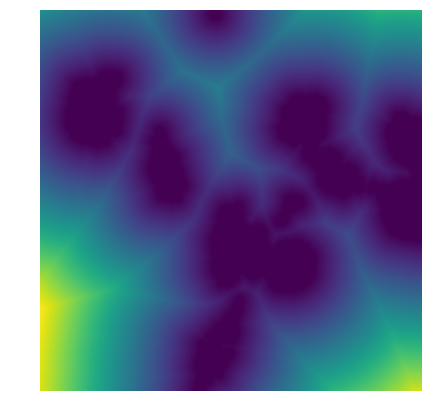

In [19]:
plt.figure(figsize=(7,7))
plt.imshow(euim)
plt.axis('off')

(-0.5, 2047.5, 2043.5, -0.5)

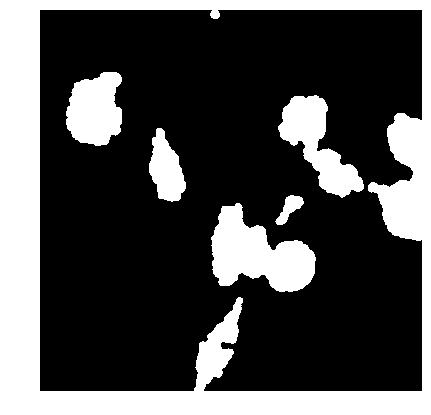

In [20]:
plt.figure(figsize=(7,7))
plt.imshow(tophim, cmap='gray')
plt.axis('off')

In [39]:
eu10 = euim < 20

In [40]:
ten = eu10.astype(int) + tophim.astype(int)

In [41]:
palette = np.array([[  0,   0,   0],   # black
                    [255,   0,   0],   # red,   # blue
                    [255, 255, 255]])
ten = palette[ten]

(-0.5, 2047.5, 2043.5, -0.5)

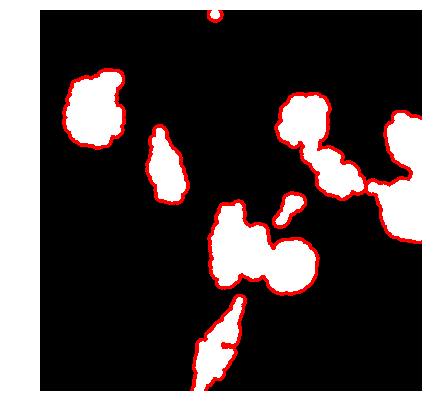

In [42]:
plt.figure(figsize=(7,7))
plt.imshow(ten)
plt.axis('off')

(-0.5, 2047.5, 2043.5, -0.5)

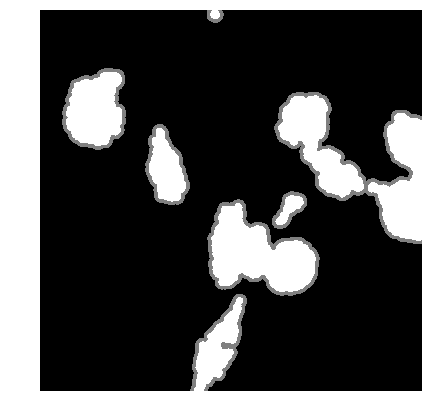

In [25]:
eu10 = euim < 20
ten = eu10.astype(int) + tophim.astype(int)

plt.figure(figsize=(7,7))
plt.imshow(ten, cmap='gray', vmax=2)
plt.axis('off')